In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
Base.classes.keys()

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# session.query(Measurement).filter(Measurement.date.between('2019-02-01', '2020-02-01')).all()

# Calculate the date 1 year ago from the last data point in the database
last_point = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
begin_point = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f"So this is the last data point {last_point} which means the beginning data point is {begin_point}.")

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= begin_point).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(data)
df=df.set_index("date")

# Sort the dataframe by date
df.head()

So this is the last data point 2017-08-23 which means the beginning data point is 2016-08-23.


,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


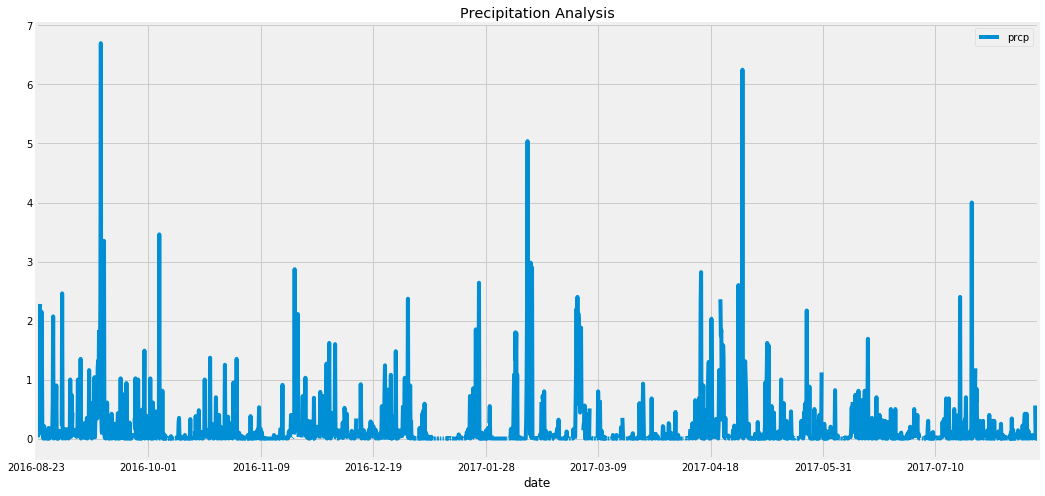

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
bar = df.plot(figsize=(16,8))
bar.set_title("Precipitation Analysis")
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Measurement).group_by(Measurement.station).count()
print(f"There are {stations} available in this dataset.")

There are 9 available in this dataset.


In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station).label('count')).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.prcp).desc()).all()

[('USC00519281', 2772),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
session.query(*sel).filter(Measurement.station=='USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [16]:
# Choose the station with the highest number of temperature observations.
temp=session.query(Measurement.tobs).\
                                filter(Measurement.station=='USC00519281').\
                                filter(Measurement.date >= begin_point).\
                                order_by(Measurement.date.desc()).all()
temp

[(79.0),
 (76.0),
 (76.0),
 (77.0),
 (77.0),
 (77.0),
 (83.0),
 (82.0),
 (77.0),
 (76.0),
 (81.0),
 (82.0),
 (81.0),
 (76.0),
 (75.0),
 (77.0),
 (75.0),
 (82.0),
 (77.0),
 (77.0),
 (77.0),
 (76.0),
 (76.0),
 (76.0),
 (80.0),
 (80.0),
 (76.0),
 (74.0),
 (74.0),
 (72.0),
 (69.0),
 (78.0),
 (78.0),
 (75.0),
 (74.0),
 (77.0),
 (78.0),
 (76.0),
 (81.0),
 (79.0),
 (76.0),
 (76.0),
 (77.0),
 (76.0),
 (73.0),
 (71.0),
 (77.0),
 (72.0),
 (72.0),
 (74.0),
 (72.0),
 (72.0),
 (75.0),
 (79.0),
 (73.0),
 (75.0),
 (74.0),
 (76.0),
 (74.0),
 (74.0),
 (74.0),
 (72.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (77.0),
 (76.0),
 (76.0),
 (80.0),
 (75.0),
 (72.0),
 (74.0),
 (80.0),
 (74.0),
 (74.0),
 (74.0),
 (74.0),
 (71.0),
 (71.0),
 (74.0),
 (76.0),
 (68.0),
 (69.0),
 (74.0),
 (74.0),
 (74.0),
 (77.0),
 (76.0),
 (75.0),
 (70.0),
 (74.0),
 (67.0),
 (70.0),
 (75.0),
 (79.0),
 (70.0),
 (75.0),
 (70.0),
 (75.0),
 (65.0),
 (60.0),
 (72.0),
 (67.0),
 (70.0),
 (74.0),
 (72.0),
 (68.0),
 (76.0),
 (72.0),
 (69.0),
 

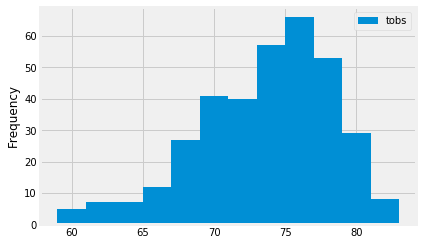

In [17]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_df=pd.DataFrame(temp)
temp_df.head()
plt.hist(temp_df['tobs'], bins=12)
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.show()

In [18]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [19]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-05-02', '2017-05-06'))


[(70.0, 76.48275862068965, 80.0)]


Text(0.5, 1.0, 'Trip Avg Temp')

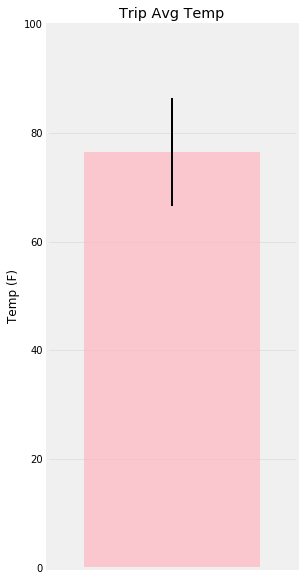

In [20]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
TMIN=70.0
TAVE=76.48275862068965
TMAX=80.0

plt.figure(figsize=(4,10))
plt.bar(0, TAVE, color="lightpink", width=1.4, 
        alpha=0.7, yerr=TMAX-TMIN, error_kw={"linewidth":2})
plt.grid(linestyle='-', linewidth='0.5', color='lightgrey')
plt.gca().set_axisbelow(True)
plt.gca().set_xticks([])
plt.xlim((-1, 1))
plt.ylim((0, 100))
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp")

In [21]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs, Station.name, Station.latitude, Station.longitude, Station.elevation]
same_sporder = session.query(*sel).filter(Measurement.station == Station.station).all()
same_sporder
df3=pd.DataFrame(same_sporder)
df3.sort_values(by='prcp', ascending=False)

,station,date,prcp,tobs,name,latitude,longitude,elevation
6700,USC00514830,2014-07-20,11.53,76.0,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
14578,USC00519281,2016-07-25,9.64,78.0,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
12563,USC00519281,2011-01-13,8.81,68.0,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
18269,USC00516128,2013-11-10,8.06,70.0,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
13843,USC00519281,2014-07-20,7.97,73.0,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
...,...,...,...,...,...,...,...,...
19532,USC00516128,2017-08-06,NaN,79.0,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
19537,USC00516128,2017-08-11,NaN,72.0,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
19539,USC00516128,2017-08-13,NaN,80.0,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
19544,USC00516128,2017-08-18,NaN,76.0,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [28]:
vacay_start='2017-05-02'
vacay_end='2017-05-06'
data4 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= vacay_start).\
    filter(Measurement.date <= vacay_end).\
    order_by((Measurement.date).desc()).all()
data4
df4=pd.DataFrame(data4)
df4.head()


,date,prcp
0,2017-05-06,0.00
1,2017-05-06,0.00
2,2017-05-06,0.06
3,2017-05-06,0.00
4,2017-05-06,0.00


In [29]:
sum_column = df4.sum(axis=0)
print (sum_column)

date    2017-05-062017-05-062017-05-062017-05-062017-0...
prcp                                                  0.6
dtype: object


## Optional Challenge Assignment

In [24]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [25]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [26]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [27]:
# Plot the daily normals as an area plot with `stacked=False`
